In [433]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import seaborn as sns
from math import comb

Firstly, I create a program to model the process of starting from position '1'- represented by the variable 1, and moving N places after obtaining value N on the coin throw. I perform 24 coin throws as after this point I must definitely be at or beyond place 25.

In [434]:
sum=1
coin=0
On_25=False 
for i in range (24): 
    coin=np.random.randint(1,3)
    sum=sum+coin
    print(sum)
    if (sum==25):
        On_25=True
print(On_25)

2
3
5
6
8
9
11
13
14
15
16
17
19
20
21
23
25
26
28
29
31
33
34
35
True


Now, I adapt my program to become a function which takes the parameter n, the number of times to model the process, and outputs the number of these times in which we land on 25. 

In [435]:


def path(n):
    number_yes=0
    for i in range(n):
        sum=1
        On_25=False
        for k in range (24): 
            coin=np.random.randint(1,3)
            sum=sum+coin
            if (sum==25):
                On_25=True
        if (On_25==True):
            number_yes=number_yes+1
    return number_yes


I model the process 100000 times and output the number of times we land on 25. I create a pi chart representing the number of times we do and do not land on 25. 

Number of times landes on 25:  66686


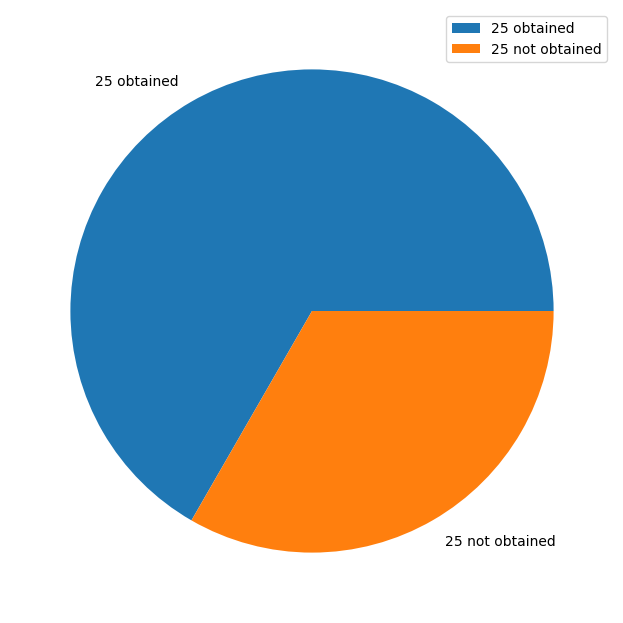

In [436]:
number_25s=path(100000)
print("Number of times landes on 25: " ,number_25s)
number_not25s=100000-number_25s
y=np.array([number_25s, number_not25s])
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
labels= '25 obtained', '25 not obtained'
plt.pie(y, labels=labels)
plt.legend()
plt.show()

Here, I perform the calculations to determine the number of possible paths as calculated by considering the solutions to the equation 2a+b=24. For each solution, I find the number of possible paths up to throw a+b and multiply this by 2 for the subsequent throws up to throw 24. The value total sums up these possibilities. I then find this value as a percentage of all possible paths, 2^(24).

In [437]:
total=0
for i in range (13):
    total=total+((comb(24-i, 24-(2*i)))*(2**i))

    
print("Total possible paths passing through 25: " ,total)
print("Total paths: " ,2**24)
print("Percentage of total paths that pass through 25: " ,(total/(2**24))*100)



Total possible paths passing through 25:  11184811
Total paths:  16777216
Percentage of total paths that pass through 25:  66.66666865348816


I addate my program to consider when we land on different values other than 25- for example below I consider 3.

In [438]:
sum=1
coin=0
On_3=False 
for i in range (2): 
    coin=np.random.randint(1,3)
    sum=sum+coin
    if (sum==3):
        On_3=True

print("Landed on 3? " ,On_3)

Landed on 3?  False


Now, I investigate how likely we are to land on 100 by performing 100000 models of the process and outputting on how many 100 is obatined. This is part of my investigation into whether there is sometthing unique about k=25 or if my findings extend to other values.

In [439]:
def path(n):
    number_yes=0
    for i in range(n):
        sum=1
        On_100=False
        for k in range (99): 
            coin=np.random.randint(1,3)
            sum=sum+coin
            if (sum==100):
                On_100=True
        if (On_100==True):
            number_yes=number_yes+1
    return number_yes

In [440]:
number=path(100000)
print("Number of models in which landed on 100: " ,number)

Number of models in which landed on 100:  66523


I create a function to find how likely we are to land on value k, where we can choose the value k takes. I run this program from k=2 to 1000 and create a scatter plot of my results.

In [441]:
def path(n,k):
    number_yes=0
    for i in range(n):
        sum=1
        On_val=False
        for j in range (k-1): 
            coin=np.random.randint(1,3)
            sum=sum+coin
            if (sum==k):
                On_val=True
        if (On_val==True):
            number_yes=number_yes+1
    return (100*number_yes/n)

In [442]:
results=np.zeros(98)
for i in range(2,100):
    results[i-2]=path(100000,i)

print(results)

[50.108 75.012 62.502 68.784 65.7   67.323 66.58  67.131 66.464 66.836
 66.427 66.42  66.613 67.032 66.565 66.625 66.783 66.673 66.641 66.95
 66.743 66.532 66.788 66.884 66.796 66.729 66.635 66.716 66.496 66.539
 66.617 66.697 66.736 66.842 66.919 66.944 66.837 66.718 66.598 67.042
 66.512 66.486 66.727 66.778 66.893 66.347 66.638 66.574 66.81  66.925
 66.592 66.584 66.72  66.676 66.679 66.68  66.911 66.489 66.669 66.771
 66.826 66.797 66.585 66.674 67.063 66.675 66.558 66.508 66.82  66.572
 66.705 66.517 66.706 66.539 66.639 66.654 66.35  66.507 66.705 66.592
 66.528 67.083 66.186 66.559 66.524 66.839 66.531 66.522 66.482 66.93
 66.615 66.547 66.525 66.733 66.662 66.61  66.703 66.538]


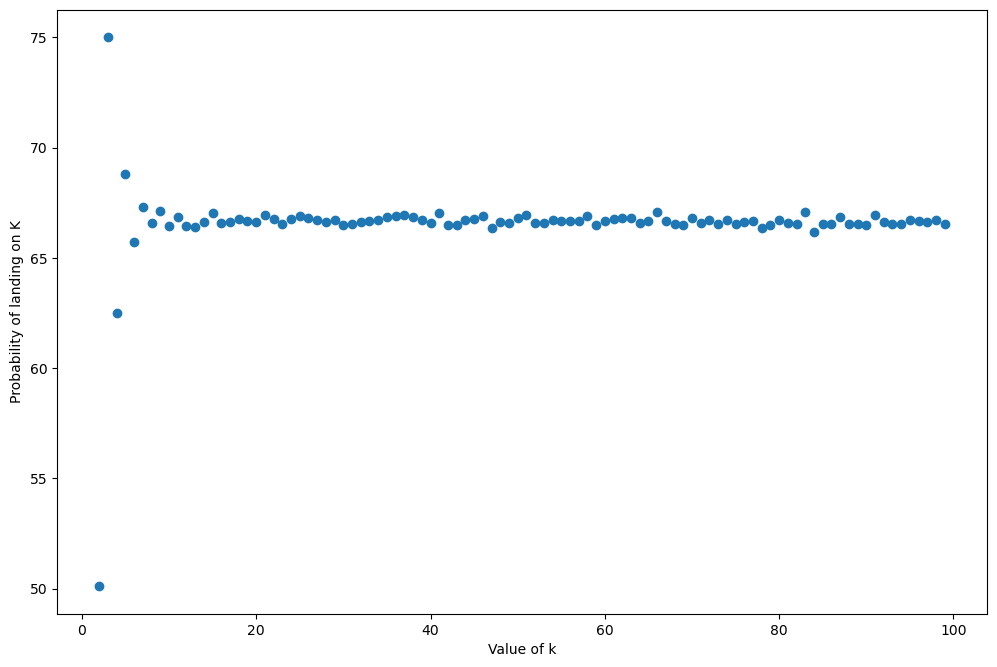

In [443]:
x=np.zeros(98)
for i in range(98):
    x[i]=i+2
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value of k")
plt.ylabel("Probability of landing on K")
plt.scatter(x,results)
plt.show()

Now, I change the rules of the process so that instead of the coin having values 1 and 2 on either side, it has values 1 and 3. I first run this program to determine how likely I am to land on 25.

In [444]:
def path(n):
    number_yes=0
    for i in range(n):
        sum=1
        On_25=False
        for k in range (24): 
            coin=np.random.randint(1,4)
            while (coin==2):
                coin=np.random.randint(1,4)
            sum=sum+coin
            if (sum==25):
                On_25=True
        if (On_25==True):
            number_yes=number_yes+1
    return number_yes


In [445]:
number=path(10000)
print("Number of times I land on 25: " ,number)

Number of times I land on 25:  5013


Now, I update my program so that I again run through different values of k, ranging from 2 to 100, with the updated rule of having two numbers a,b on either side of the coin. For example, below I set these two values to be 4 and 6, and create a scatter plot of my results.

In [450]:
def path(n,k):
    number_yes=0
    for i in range(n):
        sum=1
        On_val=False
        for j in range (k-1): 
            coin=np.random.randint(4,7)
            while ((coin==5)):
                coin=np.random.randint(4,7)
            sum=sum+coin
            if (sum==k):
                On_val=True
        if (On_val==True):
            number_yes=number_yes+1
    return (100*number_yes/n)

[ 0.    0.    0.   49.95  0.   50.18  0.   25.11  0.   50.11  0.   37.6
  0.   36.81  0.   44.12  0.   37.2   0.   39.8   0.   40.68  0.   38.77
  0.   40.81  0.   39.7   0.   40.79  0.   40.23  0.   39.57  0.   40.29
  0.   39.41  0.   40.4   0.   40.01  0.   39.86  0.   40.52  0.   40.4
  0.   39.68  0.   39.62  0.   38.97  0.   39.47  0.   39.25  0.   39.62
  0.   40.63  0.   40.06  0.   39.83  0.   40.35  0.   39.84  0.   39.46
  0.   40.    0.   39.78  0.   39.84  0.   39.56  0.   40.09  0.   40.01
  0.   39.97  0.   40.16  0.   39.58  0.   39.68  0.   40.49  0.   41.42
  0.   40.05]


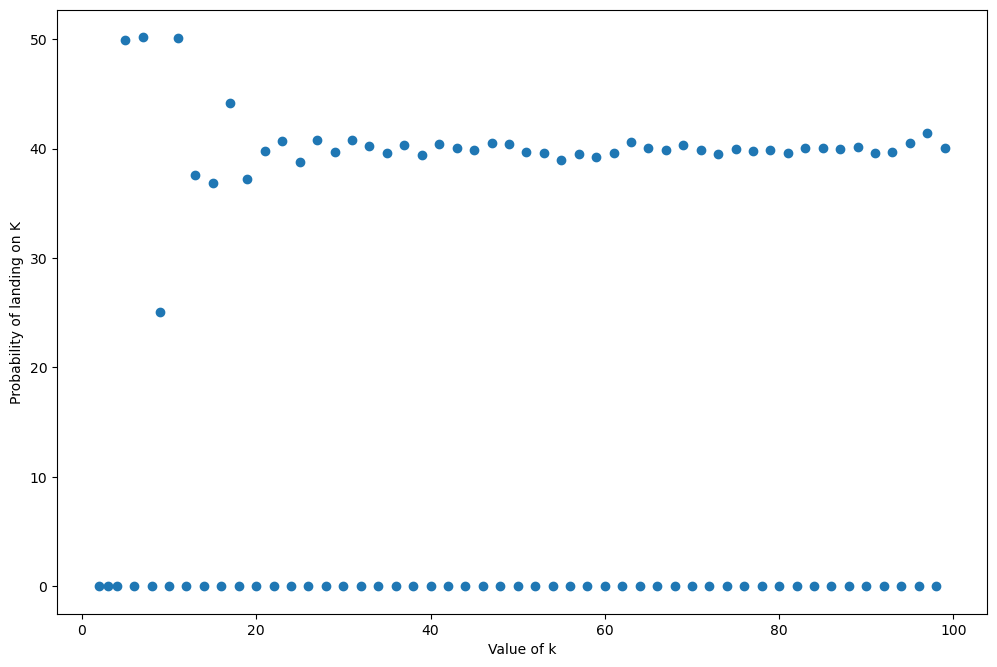

In [451]:
results=np.zeros(98)
for i in range(2,100):
    results[i-2]=path(10000,i)

print(results)

x=np.zeros(98)
for i in range(98):
    x[i]=i+2

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Value of k")
plt.ylabel("Probability of landing on K")
plt.scatter(x,results)
plt.show()